In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("concat_df_terrorism.csv")
pd.set_option('display.max_columns', None)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16332\1886519131.py:1: DtypeWarning: Columns (56,74,109,110) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("concat_df_terrorism.csv")


In [3]:
df.sample(2)

,iyear,imonth,iday,approxdate,extended,resolution,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
2227,2014,12,12,NaN,0,NaN,Plateau,Jos,9.932383,8.883321,1.0,0,Incident occurred in the Kwana Shagari area of...,12/12/2014: Security forces discovered and def...,1,1,1,0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,147.0,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,14.0,Time Fuse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Jos Explosion: Casualty Figure Rises To 37, A...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
883,2012,6,9,NaN,0,NaN,Kano,Kano,11.974328,8.500261,1.0,0,Kawo Tishama area,06/09/2012: Assailants attacked a customs offi...,1,1,1,0,NaN,NaN,1.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,2,Government (General),18.0,"Government Personnel (excluding police, military)",Nigerian Customs Service (NCS),Officer,147.0,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Gunmen Kill Custom Officer, SSS Operative i...",NaN,NaN,START Primary Collection,-9,-9,0,-9,"201206090015, 201206090016"


In [22]:
df.rename(columns={"iyear":"year","imonth":"month","iday":"day"},inplace=True)

In [23]:
df.columns

Index(['year', 'month', 'day', 'extended', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte',
       'property', 'propcomment', 'ishostkid', 'scite1', 'scite2', 'scite3',
       'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [6]:
df.shape

(5998, 130)

In [7]:
df.isnull().sum()

iyear            0
imonth           0
iday             0
approxdate    5684
extended         0
              ... 
INT_LOG          0
INT_IDEO         0
INT_MISC         0
INT_ANY          0
related       3977
Length: 130, dtype: int64

In [8]:
df.isnull().mean() * 100

iyear          0.000000
imonth         0.000000
iday           0.000000
approxdate    94.764922
extended       0.000000
                ...    
INT_LOG        0.000000
INT_IDEO       0.000000
INT_MISC       0.000000
INT_ANY        0.000000
related       66.305435
Length: 130, dtype: float64

In [9]:
# Get the counts of null values for all columns
null_counts = df.isnull().sum()

# Loop through columns and print null counts
for cols,count in null_counts.items():
    percentage = (count/len(df))*100
    print(f"{cols} :{count}:{percentage:.1f})")

iyear :0:0.0)
imonth :0:0.0)
iday :0:0.0)
approxdate :5684:94.8)
extended :0:0.0)
resolution :5768:96.2)
provstate :0:0.0)
city :0:0.0)
latitude :48:0.8)
longitude :48:0.8)
specificity :0:0.0)
vicinity :0:0.0)
location :3202:53.4)
summary :60:1.0)
crit1 :0:0.0)
crit2 :0:0.0)
crit3 :0:0.0)
doubtterr :0:0.0)
alternative :5270:87.9)
alternative_txt :5270:87.9)
multiple :0:0.0)
success :0:0.0)
suicide :0:0.0)
attacktype1 :0:0.0)
attacktype1_txt :0:0.0)
attacktype2 :4485:74.8)
attacktype2_txt :4485:74.8)
attacktype3 :5843:97.4)
attacktype3_txt :5843:97.4)
targtype1 :0:0.0)
targtype1_txt :0:0.0)
targsubtype1 :167:2.8)
targsubtype1_txt :167:2.8)
corp1 :170:2.8)
target1 :5:0.1)
natlty1 :10:0.2)
natlty1_txt :10:0.2)
targtype2 :5377:89.6)
targtype2_txt :5377:89.6)
targsubtype2 :5390:89.9)
targsubtype2_txt :5390:89.9)
corp2 :5405:90.1)
target2 :5379:89.7)
natlty2 :5387:89.8)
natlty2_txt :5387:89.8)
targtype3 :5896:98.3)
targtype3_txt :5896:98.3)
targsubtype3 :5899:98.3)
targsubtype3_txt :5899:98.

## Removing the columns that have missing values greater than 50%

#### 75 columns are removed
#### (5998, 55) are left for our Analysis

In [24]:
missing_percentage  = df.isnull().mean() *100
columns_to_remove = missing_percentage[missing_percentage > 50].index
df = df.drop(columns=columns_to_remove)
df.head(2)

,year,month,day,extended,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propcomment,ishostkid,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1976,2,13,0,Lagos,Lagos,6.452331,3.419044,1.0,0,02/13/1976: Assailants attacked General Murtal...,1,1,1,0,0.0,1,0,1,Assassination,2,Government (General),17.0,Head of State,Government of Nigeria,4th Head of State: General Murtala Ramat Mohammed,147.0,Nigeria,Coup plotters,0.0,0,-99.0,-99.0,0.0,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,3.0,0.0,0.0,1.0,0.0,0.0,0,NaN,0.0,"Segun Akande, ""42 years ago, one of Nigeria's ...","""Anniversary: Motoring Error that Led to the K...",NaN,UMD Miscellaneous,-9,-9,0,-9
1,1980,1,17,0,Kaduna,Kaduna,10.530204,7.437338,1.0,0,NaN,1,1,1,0,0.0,1,0,9,Unknown,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,Consulate,216.0,Great Britain,Zimbabwe Patriotic Front,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1.0,NaN,NaN,NaN,PGIS,1,1,1,1


In [11]:
df.shape

(5998, 55)

# How many Suicide attacks happened

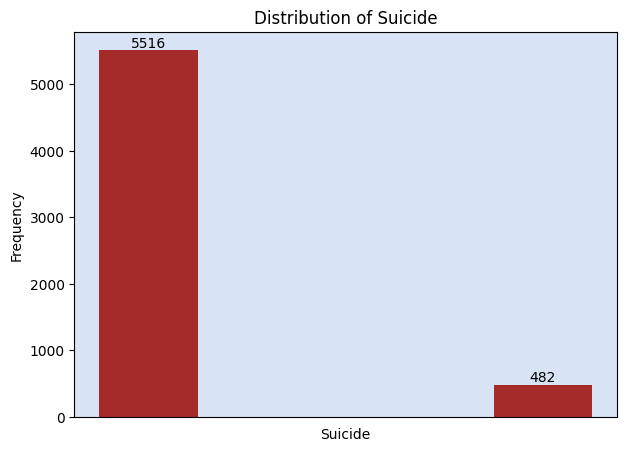

In [103]:
plt.figure(figsize=(7,5)) # Set the figure size
# Count the occurrences of each value

value_counts = df['suicide'].value_counts()
# Create a bar plot


plt.bar(x=value_counts.index, height=value_counts.values,width=0.25,color='brown')
# Add labels and title
plt.xlabel('Suicide')
plt.ylabel('Frequency')
plt.title('Distribution of Suicide')

# Display the counts on top of the bars
for i ,count in enumerate(value_counts.values):
    plt.text(i,count,str(count),ha='center',va='bottom')

# Add a nice background color to the plot
plt.gca().set_facecolor('#D8E4F5')
# Remove x-axis numbers
plt.xticks([])
# Display the plot
plt.show()

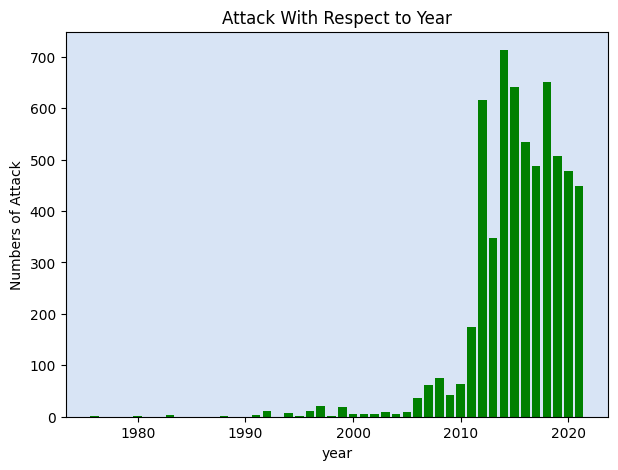

In [104]:
plt.figure(figsize=(7,5)) # Set the figure size
# Count the number of suicide attacks in each year
year_counts = df['year'].value_counts()
plt.xlabel("year")
plt.ylabel("Numbers of Attack")
plt.title("Attack With Respect to Year")
# Create a bar plot
plt.bar(x=year_counts.index, height=year_counts.values,color ='green',width=0.8)
plt.gca().set_facecolor('#D8E4F5')
plt.show()

In [76]:
df['city'].nunique()

2615

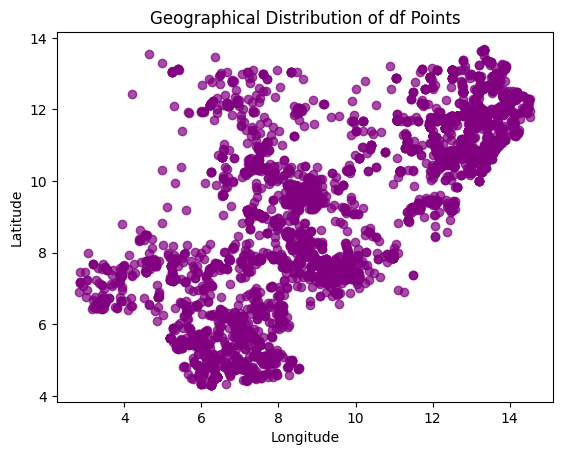

In [15]:
# Scatter plot of latitude and longitude
plt.scatter(df['longitude'], df['latitude'],c= 'purple',alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of df Points')
plt.show()

In [19]:
df.head(1)

,iyear,imonth,iday,extended,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propcomment,ishostkid,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1976,2,13,0,Lagos,Lagos,6.452331,3.419044,1.0,0,02/13/1976: Assailants attacked General Murtal...,1,1,1,0,0.0,1,0,1,Assassination,2,Government (General),17.0,Head of State,Government of Nigeria,4th Head of State: General Murtala Ramat Mohammed,147.0,Nigeria,Coup plotters,0.0,0,-99.0,-99.0,0.0,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,3.0,0.0,0.0,1.0,0.0,0.0,0,NaN,0.0,"Segun Akande, ""42 years ago, one of Nigeria's ...","""Anniversary: Motoring Error that Led to the K...",NaN,UMD Miscellaneous,-9,-9,0,-9


34

In [ ]:
print(df['extended'].unique())   ## what is extended [0,1]
print(df['provstate'].unique())

In [ ]:
print(df['city'].nunique())